In [102]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

import pandas as pd

In [119]:
flights_weather_one_hot_df = pd.read_csv('../data/intermediate/modelling/flights_weather_one_hot.csv')
flights_weather_modelling_df = pd.read_csv('../data/intermediate/modelling/flights_weather_modelling.csv')
flights_weather_df = pd.read_csv('../data/intermediate/modelling/flights_weather.csv')
flight_weather_df = flight_weather_one_hot_df.astype(float)

In [125]:
flights_weather_df.dtypes

INDEX                 int64
IS_WEATHER_DELAY      int64
temp                float64
pressure              int64
humidity              int64
dew_point           float64
clouds                int64
visibility            int64
wind_speed          float64
rainfall_1hr        float64
rainfall_3hr        float64
snowfall_1hr        float64
snowfall_3hr        float64
thunderstorm          int64
drizzle               int64
rain                  int64
snow                  int64
mist                  int64
smoke                 int64
haze                  int64
dust                  int64
fog                   int64
sand                  int64
ash                   int64
squall                int64
tornado               int64
dtype: object

Decision Trees

In [126]:
X = flights_weather_df.drop(["INDEX", "IS_WEATHER_DELAY", "rainfall_1hr", "rainfall_3hr", "snowfall_1hr", "snowfall_3hr"], axis=1)
y = flights_weather_df["IS_WEATHER_DELAY"]

# split dataset into training and testing sets
# hyperparameters: training and testing split percentage
# random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# create a decision tree model with no stopping conditions
model = DecisionTreeClassifier(criterion="entropy")

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
    
# get cross-validation scores
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
    
print("Accuracy:", cv_scores)

Accuracy: [0.55735493 0.58648649 0.53378378 0.58783784 0.56621622 0.57027027
 0.57162162 0.57027027 0.60540541 0.61351351]


In [73]:
X.dtypes

temp                                        float64
pressure                                    float64
humidity                                    float64
dew_point                                   float64
clouds                                      float64
visibility                                  float64
wind_speed                                  float64
rainfall_1hr                                float64
rainfall_3hr                                float64
snowfall_1hr                                float64
snowfall_3hr                                float64
mist                                        float64
smoke                                       float64
haze                                        float64
dust                                        float64
fog                                         float64
sand                                        float64
ash                                         float64
squall                                      float64
tornado     

In [131]:
best_params = []

# hyperparameters to fine-tune
dt_params = {
    'max_depth': [2, 4, 6, 8, 10, 20, 30, None], # maximum depth of the tree, can help prevent overfitting
    'min_samples_split': [2, 5, 10], # the minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4] # the minimum number of samples required to be at a leaf node.
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = DecisionTreeClassifier(criterion="entropy")

# hyperparameter tuning
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1, criterion="entropy"), dt_params, cv=10)

# Train the fine-tuned models
dt_grid.fit(X_train, y_train)

# get the best models 
dt_best = dt_grid.best_estimator_
print("Pre-pruned Decision Tree Best Params: " + str(dt_grid.best_params_))
    
# evaluate the model
# make predictions on the testing data
y_pred = dt_best.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Pre-pruned Decision Tree: ", accuracy)

Pre-pruned Decision Tree Best Params: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of Pre-pruned Decision Tree:  0.6095100864553314


Random Forests

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf = RandomForestClassifier(n_estimators=100, random_state=0)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 63.21%


Adaboost

In [129]:
# Define the base classifier for AdaBoost
base_clf = DecisionTreeClassifier(max_depth=1, random_state=42)

# Define the AdaBoost classifier and set hyperparameters
ada_clf = AdaBoostClassifier(base_estimator=base_clf, n_estimators=100, learning_rate=0.1, random_state=42)

# Train the AdaBoost classifier on the training data
ada_clf.fit(X_train, y_train)

# Predict the labels of the test data using the trained AdaBoost classifier
y_pred = ada_clf.predict(X_test)

# Evaluate the performance of the AdaBoost classifier using accuracy and ROC AUC score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 62.72%


In [ ]:
XGBoost

In [132]:
# Define the XGBoost classifier and set hyperparameters
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=100)

# Train the XGBoost classifier on the training data
xgb_clf.fit(X_train, y_train)

# Predict the labels of the test data using the trained XGBoost classifier
y_pred = xgb_clf.predict(X_test)

# Evaluate the performance of the XGBoost classifier using accuracy and ROC AUC score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 63.80%


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

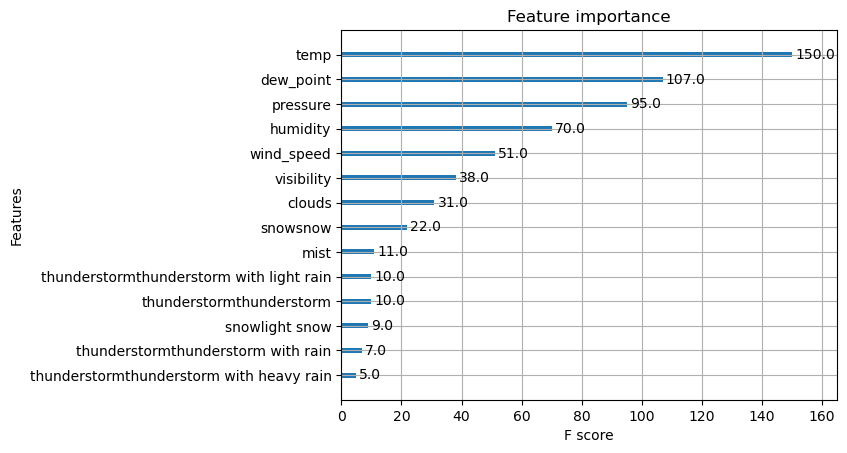

In [124]:
xgb.plot_importance(xgb_clf)